Random Forest -> This example uses the NSL-KDD dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Define file paths
train_path = '/content/drive/My Drive/datasets/KDDTrain+.txt'
test_path = '/content/drive/My Drive/datasets/KDDTest+.txt'

columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes", "land",
    "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in", "num_compromised",
    "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells",
    "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login", "count",
    "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
    "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate",
    "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate",
    "attack", "level"
]


# Load training and test data
df_train = pd.read_csv(train_path, names=columns)
df_test = pd.read_csv(test_path, names=columns)






In [ ]:
df_train.head()
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
# Select relevant features and the target label
features = ["duration", "protocol_type", "service", "src_bytes", "dst_bytes", "flag", "wrong_fragment", "count"]
X_train = df_train[features]
y_train = df_train["attack"].apply(lambda x: 1 if x != "normal" else 0)  # Binary classification: 1 for attack, 0 for normal
X_test = df_test[features]
y_test = df_test["attack"].apply(lambda x: 1 if x != "normal" else 0)



In [ ]:
# Encode categorical features
X_train = pd.get_dummies(X_train, columns=["protocol_type", "service", "flag"])
X_test = pd.get_dummies(X_test, columns=["protocol_type", "service", "flag"])

# Ensure columns match between train and test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict on test data and evaluate
y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=["Normal", "Attack"]))


Test Accuracy: 0.82
              precision    recall  f1-score   support

      Normal       0.72      0.97      0.82      9711
      Attack       0.97      0.71      0.82     12833

    accuracy                           0.82     22544
   macro avg       0.84      0.84      0.82     22544
weighted avg       0.86      0.82      0.82     22544



In [ ]:
# Get feature importances from the random forest model
mdi_importances = rf_model.feature_importances_
indices = np.argsort(mdi_importances)[::-1]




NameError: name 'mdi_importances' is not defined

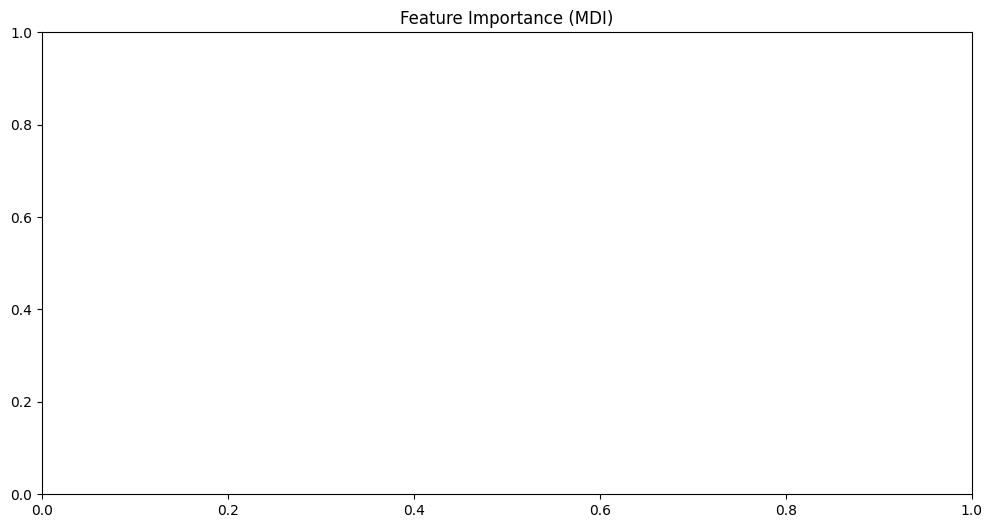

In [ ]:
# Plot the MDI importance of top features
plt.figure(figsize=(12, 6))
plt.title("Feature Importance (MDI)")
plt.bar(range(len(features)), mdi_importances[indices], align="center")
plt.xticks(range(len(features)), [X_train.columns[i] for i in indices], rotation=90)
plt.show()

In [ ]:
# Permutation Importance
perm_importance = permutation_importance(rf_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Plot the Permutation Importance of top features
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(12, 6))
plt.title("Permutation Importance")
plt.barh(range(len(features)), perm_importance.importances_mean[sorted_idx])
plt.yticks(range(len(features)), [X_train.columns[i] for i in sorted_idx])
plt.show()
